In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.lib.function_base import disp
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from pyparsing.helpers import List
import joblib
import sklearn
from tqdm import tqdm
import warnings
from IPython.display import display
import scipy.spatial as sps 
import random
import warnings

In [2]:
#load in data with pca
data_vaa = pd.read_csv("data/VAA.csv")
data_vaa.dropna(inplace = True)

In [3]:
#select answer columns
data_vaa = data_vaa.iloc[:,3:31]

In [4]:
#replace text answers with encoding
replacements = {
    "Lidt enig":1,
    "Enig":2,
    "Lidt uenig":-1,
    "Uenig":-2
}
data_vaa = data_vaa.replace(replacements)

In [5]:
#data now looks like this
data_vaa

Name  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  ...  Q16  \
0                  Lea Wermelin   1   1   1  -2   2  -1   1  -1  -1  ...    1   
1                Steen Frandsen  -1   1   1  -2   2  -2  -1  -2  -2  ...   -2   
2              Lars Goldschmidt   1  -1  -1  -2   1  -1  -1  -1  -1  ...   -1   
3                 Birger Nissen   1  -1  -2  -2   2  -1  -2   1   1  ...    2   
7              Henriette Søvind   1  -1   2  -1   1  -1  -2   1  -1  ...   -1   
...                         ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   
1005                 Helle Wium   2   1  -1  -2  -1  -2  -1  -1   1  ...    2   
1006       Berit Naomi Skjernaa   2   2  -2  -1  -1  -2  -1   2   2  ...    1   
1007  Vinni Kjærgaard Jørgensen   1   1  -2  -2   1  -2  -2  -1   1  ...    2   
1010        Thor Clasen Jonasen  -1   2  -2  -2  -2  -2  -1  -1   1  ...    2   
1012    Chresten Heesgård Ibsen   1  -1  -1  -1   2  -1  -1   1   2  ...    1   

      Q17  Q18  Q19  Q20  Q21  Q22  Q23  Q24  Q25  
0       1    1    2    2   -2    1    1    1    1  
1      -1    2    2    2   -2    2   -1    1    1  
2      -2    1   -1    1   -2   -1    1    1   -1  
3      -2    1   -2   -2    1    1    2    2    1  
7      -1   -1    1    1    1    1   -1    1    1  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  
1005   -2    2   -1   -2    2    2    2   -1    2  
1006   -2    1    2   -2    1    2    2    2    2  
1007   -2    1   -2   -2   -2    2    2    1    2  
1010   -2    2   -1   -2    2    1    2    1    1  
1012   -2    1    2   -2   -1   -1    2    1   -1  

[872 rows x 26 columns]

In [6]:
#load the questions and themes (qat) data
qat = pd.read_csv("data/Questions _ Themes.csv")
order = list(qat.sort_values("Theme")["Question Number"])
data_qat = data_vaa[order]

In [7]:
data_qat

Q2  Q21  Q9  Q16  Q12  Q11  Q14  Q4  Q5  Q20  ...  Q3  Q18  Q25  Q19  \
0      1   -2  -1    1    1    1    1  -2   2    2  ...   1    1    1    2   
1      1   -2  -2   -2    1   -2    1  -2   2    2  ...   1    2    1    2   
2     -1   -2  -1   -1   -1   -1   -1  -2   1    1  ...  -1    1   -1   -1   
3     -1    1   1    2    2    1    2  -2   2   -2  ...  -2    1    1   -2   
7     -1    1  -1   -1    1   -2   -1  -1   1    1  ...   2   -1    1    1   
...   ..  ...  ..  ...  ...  ...  ...  ..  ..  ...  ...  ..  ...  ...  ...   
1005   1    2   1    2   -1   -1    1  -2  -1   -2  ...  -1    2    2   -1   
1006   2    1   2    1   -2    2    1  -1  -1   -2  ...  -2    1    2    2   
1007   1   -2   1    2   -2    2    1  -2   1   -2  ...  -2    1    2   -2   
1010   2    2   1    2   -1    2   -2  -2  -2   -2  ...  -2    2    1   -1   
1012  -1   -1   2    1   -1    1    1  -1   2   -2  ...  -1    1   -1    2   

      Q7  Q15  Q10  Q8  Q6  Q22  
0      1    1    1  -1  -1    1  
1     -1    1   -1  -2  -2    2  
2     -1    1   -1  -1  -1   -1  
3     -2    1   -1   1  -1    1  
7     -2   -1    1   1  -1    1  
...   ..  ...  ...  ..  ..  ...  
1005  -1    1   -1  -1  -2    2  
1006  -1    2   -1   2  -2    2  
1007  -2    1   -2  -1  -2    2  
1010  -1    1   -1  -1  -2    1  
1012  -1    1    1   1  -1   -1  

[872 rows x 25 columns]

In [8]:
qat.sort_values("Theme")

Question Number                                           Question  \
1               Q2  Der skal indføres en særlig skat på de allerhø...   
20             Q21           Den såkaldte Arne-pension skal afskaffes   
8               Q9  Der skal indføres skat på fortjenesten ved sal...   
15             Q16  Der skal indføres kvoter, der sikrer mindst 30...   
11             Q12  Pensionsalderen skal fortsætte med at stige i ...   
10             Q11  Transkønnede under 18 år skal have mulighed fo...   
13             Q14         Der bør dannes en regering hen over midten   
3               Q4               På sigt skal Danmark meldes ud af EU   
4               Q5  Det er fornuftigt, at Danmark i de kommende år...   
19             Q20  Asylansøgere bør sendes til et land uden for E...   
16             Q17  Der skal være permanent grænsekontrol mellem D...   
0               Q1  Danmark skal bruge flere penge på at styrke to...   
22             Q23        Danmark bør indføre CO2-afgift på flyrejser   
12             Q13  Danmark skal undersøge muligheden for at udvik...   
23             Q24  Det er en god idé med naturnationalparker, hvo...   
2               Q3  Kriminalitet begået i udsatte boligområder ska...   
17             Q18  Man skal automatisk blive organdonor, når man ...   
24             Q25  Unge op til 24 år skal have ret til gratis off...   
18             Q19  Der skal udflyttes flere uddannelsespladser fr...   
6               Q7  Forældres indkomst skal være et af kriterierne...   
14             Q15  Der skal afsættes penge til at hjælpe kontanth...   
9              Q10  Det er en god idé, at dagpengesatsen for nyudd...   
7               Q8  Det skal være muligt at tjene penge på at driv...   
5               Q6  Det er okay, at den økonomiske ulighed stiger,...   
21             Q22  Lønnen til ansatte i klassiske velfærdsfag som...   

                       Theme  
1   ARBEJDSMARKED OG ØKONOMI  
20  ARBEJDSMARKED OG ØKONOMI  
8   ARBEJDSMARKED OG ØKONOMI  
15  ARBEJDSMARKED OG ØKONOMI  
11  ARBEJDSMARKED OG ØKONOMI  
10                 DEMOKRATI  
13                 DEMOKRATI  
3             EU OG UDENRIGS  
4             EU OG UDENRIGS  
19            EU OG UDENRIGS  
16            EU OG UDENRIGS  
0            KLIMA OG ENERGI  
22           KLIMA OG ENERGI  
12           KLIMA OG ENERGI  
23           KLIMA OG ENERGI  
2               RET OG STRAF  
17                   SUNDHED  
24                   SUNDHED  
18                UDDANNELSE  
6                 UDDANNELSE  
14                   VELFÆRD  
9                    VELFÆRD  
7                    VELFÆRD  
5                    VELFÆRD  
21                   VELFÆRD

## Simulated random data

In [9]:
data_3 = data_vaa.iloc[:,1:26]
data_qat = data_qat.iloc[:,1:26]

In [10]:
#find the correlation matrix for the candidate data (not used just interesting to compare with cov matrix)
data_cor = np.corrcoef(data_qat.to_numpy(dtype = "float32"),rowvar=False)

#these numbers are saved in a file
np.savetxt("data/cor_matrix.csv", data_cor, delimiter=",")

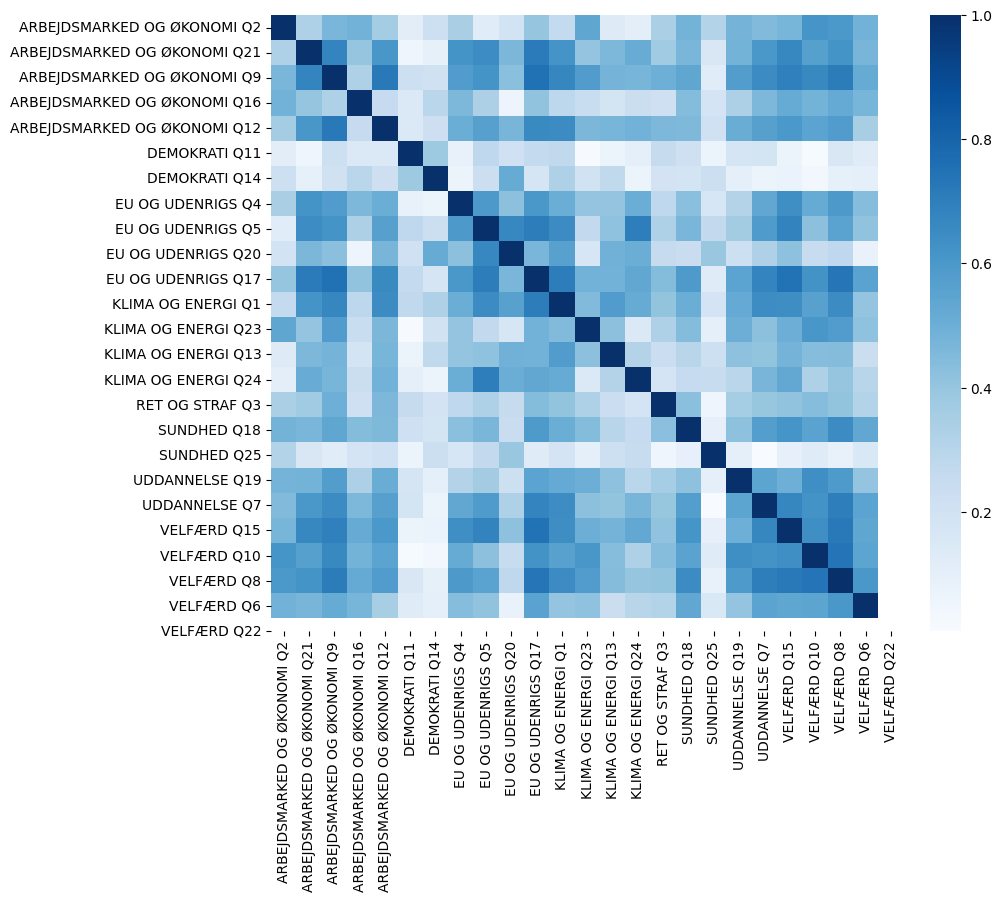

In [11]:
# plot the heatmap of the correlation matrix to explore relationship between questions in candidate data
axis_lab = qat.sort_values("Theme")["Theme"]+" "+qat.sort_values("Theme")["Question Number"]
plt.figure(figsize=(10,8))
sns.heatmap(np.absolute(data_cor), 
        xticklabels=axis_lab,
        yticklabels=axis_lab,cmap="Blues");

In [12]:
#find the covariance matrix
data_qat_cov = np.cov(data_qat.to_numpy(dtype = "float32"),rowvar=False)

#this is saved in a file too
np.savetxt("data/cov_matrix.csv", data_qat_cov, delimiter=",")

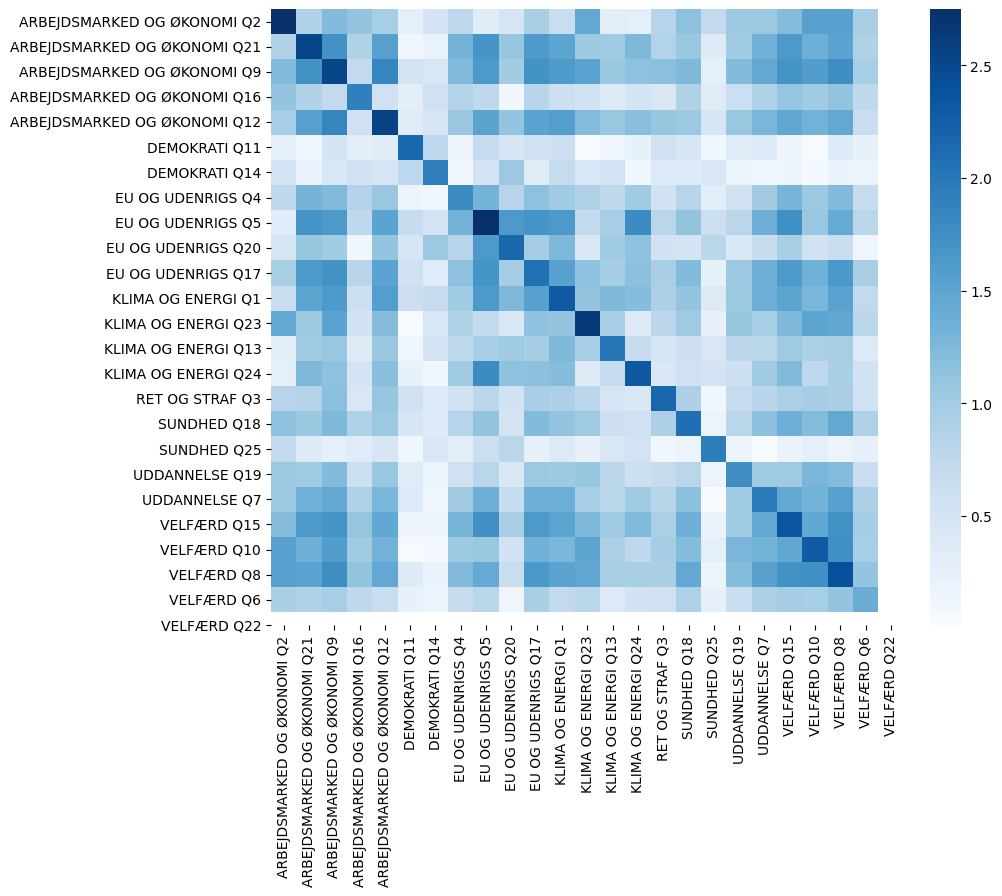

In [13]:
# plot the heatmap of the covariance matrix of candidate data
plt.figure(figsize=(10,8))
sns.heatmap(np.absolute(data_qat_cov), 
        xticklabels=axis_lab,
        yticklabels=axis_lab,cmap="Blues");

In [14]:
#calculate question means
means = data_3.mean() 
data_4 = np.cov(data_3.to_numpy(dtype = "float32"),rowvar=False)
#generate Simulated Random sample from means and covariance matrix
np.random.seed(seed = 42)
Sim_random_sample = np.random.multivariate_normal(means, data_4, size=50000) 
Sim_random_sample.shape

(50000, 25)

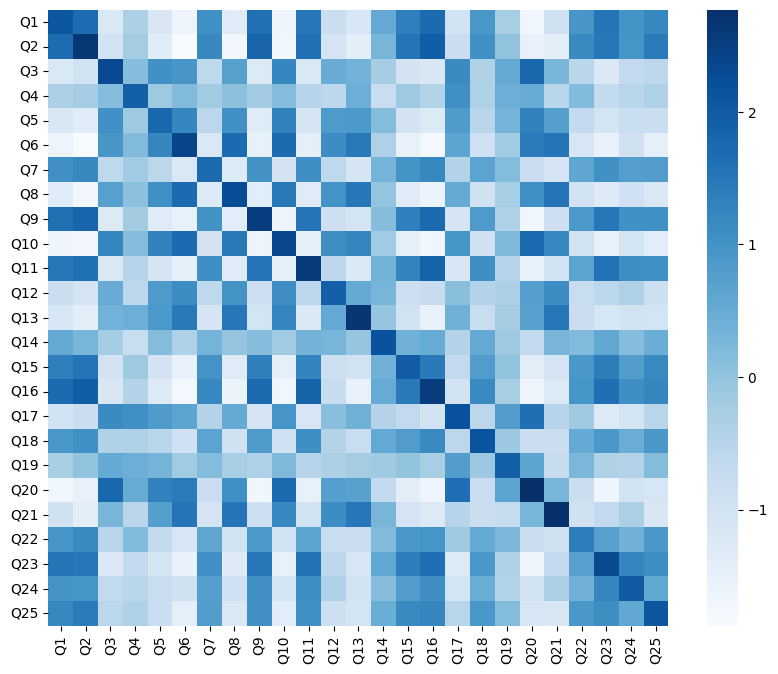

In [15]:
check_cov = np.cov(Sim_random_sample,rowvar=False) #find the covariance matrix of the simulated random data
# plot the heatmap of the random covariance matrix
plt.figure(figsize=(10,8))
sns.heatmap(check_cov, 
        xticklabels=data_3.columns,
        yticklabels=data_3.columns,cmap="Blues")
plt.savefig("Random EDA pics/Covariance_Random_Heatmap.png") #save in a figure if needed

In [16]:
#Our answers are discrete so we have to round them to the closet value

def round_to_set(n):
  if n<0:
    if n<-1.5:
      return -2
    else:
      return -1
  else:
    if n<1.5:
      return 1
    else:
      return 2 

round_to_set_vec = np.vectorize(round_to_set)

In [17]:
# round
rounded_Sim_Random_sample = round_to_set_vec(Sim_random_sample).astype("int32")
rounded_Sim_Random_sample

array([[-1,  1,  1, ..., -1,  1,  1],
       [ 1,  1,  1, ..., -1,  2,  1],
       [ 1, -2, -2, ..., -1, -1,  1],
       ...,
       [ 1, -1, -1, ...,  2, -1,  1],
       [ 2, -1, -2, ...,  2,  2,  1],
       [ 1, -1, -1, ...,  1, -1,  1]], dtype=int32)

<Axes: >

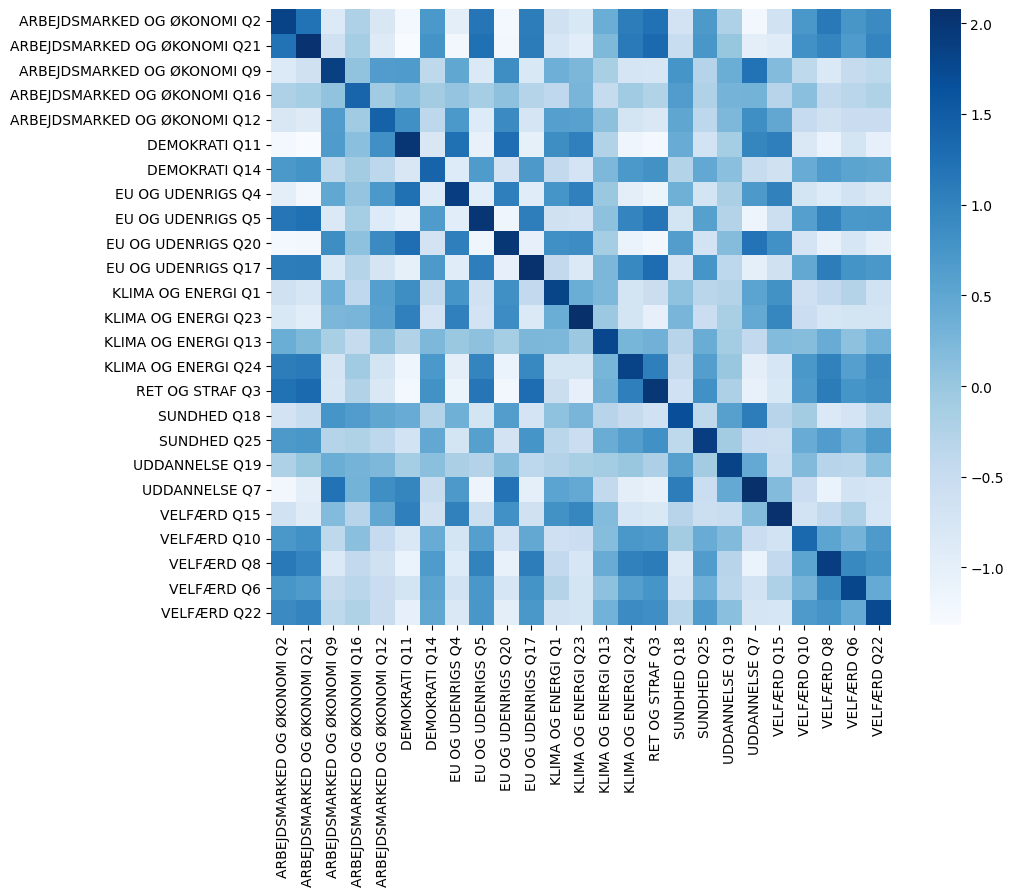

In [18]:
### Check again but for simulated random data in correct, rounded, format ###

#find the covariance matrix of the random data
check_cov = np.cov(rounded_Sim_Random_sample,rowvar=False)

# plot the heatmap of the random covariance matrix
plt.figure(figsize=(10,8))
sns.heatmap(check_cov, 
        xticklabels=axis_lab,
        yticklabels=axis_lab,cmap="Blues")

In [19]:
#save final data in a file
np.savetxt("data/simulated random data.csv", rounded_Sim_Random_sample, delimiter=",",fmt = "%d")

# Totally random data

In [20]:
def random_to_set(n):
  if n<0.25:
    return -2
  elif n<0.5:
    return -1
  elif n<0.75:
    return 1
  else:
    return 2
random_to_set_vec = np.vectorize(random_to_set)

In [21]:
np.random.seed(seed = 42)
m = np.random.rand(50000,25)
totally_random = random_to_set_vec(m).astype("int32")
totally_random
np.savetxt("data/random_sample.csv", totally_random, delimiter=",",fmt = "%d")#save final data in a file

# Classify random and simulated random data

In [22]:
def manhattan_distance(reducedpartyData,user_input):
  data = reducedpartyData.copy()
  data.loc[:,'Distance'] = data.apply(lambda row : sps.distance.cityblock(list(row.iloc[1:]), user_input), axis = 1)
  match = data.sort_values("Distance").iloc[0]
  return ('Manhattan', match['Party']) 

def euclidean_distance(reducedpartyData, user_input):
  data = reducedpartyData.copy()
  data.loc[:,'Distance'] = data.apply(lambda row : sps.distance.euclidean(list(row.iloc[1:]), user_input), axis = 1)
  match = data.sort_values("Distance").iloc[0]
  return ('Euclidean', match['Party'])

def random_distance(reducedpartyData):
  parties = list(reducedpartyData['Party'].unique())
  random_row_index = random.randint(0,len(parties)-1)
  return ('Random', parties[random_row_index])

def qda_distance(user_input, pipeline=None):
  if pipeline == None:
    pipeline = joblib.load('models\QDA_Pipeline_All.pkl')
  num_user_input = np.array(user_input).reshape(1, -1)
  prediction =  pipeline.predict(num_user_input)[0]
  return ('QDA', prediction)

In [23]:
def find_distances(user_input,pipeline=None,partyData=None):
  """this is the only function that should be called directly, 
  it takes the method string, user input list, and storkreds string
  and it returns the row in the candidate_data of the closest candidate 
  for all methods except QDA which returns the predicted party"""

  #load candidate data and reduce to relevant subsection of data
  matches = []
  #Euclidean
  matches.append(euclidean_distance(partyData,user_input))

  #Manhattan
  matches.append(manhattan_distance(partyData,user_input))
  
  #QDA
  #qda_distance(user_input)
  if pipeline == None:
    matches.append(qda_distance(user_input))
  else:
    matches.append(qda_distance(user_input,pipeline))
  
  #Random
  matches.append(random_distance(partyData))
  random.shuffle(matches)
  return matches #[("Euclidean", "Option 1"), ("Manhattan", "Option 2"), ("QDA", "Option 3"), ("Random", "Option 4")]

In [24]:
#stops output of warnings that have been checked and can be safely ignored
warnings.filterwarnings("ignore", category=UserWarning)

In [25]:
#Run distance on random data
random_data = pd.read_csv("data/random_sample.csv",header = None, names = [x+1 for x in range(25)])
simulated_random_data = pd.read_csv("data/simulated random data.csv", header = None, names = [x+1 for x in range(25)])

In [26]:
random_data = pd.read_csv("data/random_sample.csv",header = None, names = [x+1 for x in range(25)])
simulated_random_data = pd.read_csv("data/simulated random data.csv", header = None, names = [x+1 for x in range(25)])

partyData = pd.read_csv("data/PartyConverted.csv").drop("Unnamed: 0",axis=1)
pipeline = joblib.load('models/QDA_Pipeline_All.pkl')

In [27]:
#Find matches for each model

r_answers = [find_distances(random_data.iloc[i],pipeline, partyData) for i in tqdm(range(50000))]
r_result = pd.DataFrame(r_answers)
r_result.to_csv("data/random sample result.csv")

lr_answers = [find_distances(simulated_random_data.iloc[i],pipeline,partyData) for i in tqdm(range(50000))]
lr_result = pd.DataFrame(lr_answers)
lr_result.to_csv("data/simulated random data result.csv")

100%|██████████| 50000/50000 [05:55<00:00, 140.75it/s]


# EDA for the random generated data

## Prepare data

In [28]:
# Make the PCA based on original data
data = pd.read_csv("data/VAA.csv")

# Make the PCA based on original data
data = data.dropna()
replacements = {
    "Lidt enig":1,
    "Enig":2,
    "Lidt uenig":-1,
    "Uenig":-2
}
data.iloc[:,-25:] = data.iloc[:,-25:].replace(replacements)
pca = PCA(n_components=2)
pca.fit(data.iloc[:,-25:])

PCA(n_components=2)

In [29]:
def make_clean(df):
    # Rename columns and change types
    df.columns = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5']

    # Rename 'Column1' to 'Run'
    df = df.rename(columns={'Column1': 'Run'})

    # Split Columns
    for i in range(4):
      df[[f"{i+2}.1", f"{i+2}.2"]] = df[f"Column{i+2}"].str.split(',', expand=True)
      df = df.drop(columns=f"Column{i+2}")

    # Remove unwanted characters
    df = df.replace({'\(': '', '\)': '', "'": ''}, regex=True)

    # Rename columns
    df = df.rename(columns={'2.1': 'Type 1', '2.2': 'Answer 1', '3.1': 'Type 2', '3.2': 'Answer 2',
                            '4.1': 'Type 3', '4.2': 'Answer 3', '5.1': 'Type 4', '5.2': 'Answer 4'})

    # Unpivot columns
    df = df.melt(id_vars=['Run'], var_name='Attribute', value_name='Value')

    # Duplicate column
    df['Attribute - Copy'] = df['Attribute']

    # Extract text after delimiter
    df['Attribute - Copy'] = df['Attribute - Copy'].str.split(' ', expand=True)[1]

    # Rename columns
    df = df.rename(columns={'Attribute - Copy': 'Number'})

    # Reorder columns
    df = df[['Run', 'Number', 'Attribute', 'Value']]

    # Extract text before delimiter
    df['Attribute'] = df['Attribute'].str.split(' ', expand=True)[0]

    # Pivot columns
    df = df.pivot(index=['Run', 'Number'], columns='Attribute', values='Value').reset_index()

    # Remove unwanted columns
    df = df.drop(columns='Number')

    # Pivot columns again
    df = df.pivot(index='Run', columns='Type', values='Answer').reset_index()

    # Sort rows by 'Run' column then drop run
    df = df.sort_values(by='Run').drop(['Run'], axis = 1)

    return df


In [30]:
#load random data
Random_Data_ = pd.read_csv("data/random_sample.csv", header = None)
Sim_Random_Data_ = pd.read_csv("data/simulated random data.csv", header = None)

#clean
Random_Data_results = make_clean(pd.read_csv("data/random sample result.csv"))
Sim_Random_Data_results = make_clean(pd.read_csv("data/simulated random data result.csv"))

#calculte pca
Random_Data_pca = pca.transform(Random_Data_)
Sim_Random_Data_pca = pca.transform(Sim_Random_Data_)

In [31]:
Random_Data_results

Type               Euclidean              Manhattan                      QDA  \
0                 V: Venstre        C: Konservative               V: Venstre   
1             M: Moderaterne    I: Liberal Alliance               V: Venstre   
2                 V: Venstre             V: Venstre               V: Venstre   
3                 V: Venstre             V: Venstre               V: Venstre   
4          D: Nye Borgerlige      D: Nye Borgerlige   K: Kristendemokraterne   
...                      ...                    ...                      ...   
49995         M: Moderaterne         M: Moderaterne   K: Kristendemokraterne   
49996             V: Venstre    O: Dansk Folkeparti      O: Dansk Folkeparti   
49997             V: Venstre        C: Konservative               V: Venstre   
49998   A: Socialdemokratiet   A: Socialdemokratiet     A: Socialdemokratiet   
49999    I: Liberal Alliance             V: Venstre      O: Dansk Folkeparti   

Type                     Random  
0        K: Kristendemokraterne  
1          A: Socialdemokratiet  
2               Å: Alternativet  
3                Q: Frie Grønne  
4                         F: SF  
...                         ...  
49995         D: Nye Borgerlige  
49996       I: Liberal Alliance  
49997                     F: SF  
49998   Æ: Danmarksdemokraterne  
49999                V: Venstre  

[50000 rows x 4 columns]

In [32]:
Sim_Random_Data_pca

array([[-2.08377438,  1.2117698 ],
       [ 0.38468937,  3.69046295],
       [-2.45066808,  0.56336949],
       ...,
       [ 2.44026434,  0.78127561],
       [ 4.05497034, -3.00413743],
       [-2.1798059 , -2.13491823]])

In [33]:
#Add pc to result data
Random_Data_results['PC1'] = Random_Data_pca[:,0]
Random_Data_results['PC2'] = Random_Data_pca[:,1]

Sim_Random_Data_results['PC1'] = Sim_Random_Data_pca[:,0]
Sim_Random_Data_results['PC2'] = Sim_Random_Data_pca[:,1]

In [34]:
Sim_Random_Data_results_nomelt = Sim_Random_Data_results
Random_Data_results_nomelt =Random_Data_results

Sim_Random_Data_results = Sim_Random_Data_results.melt(['PC1', 'PC2'])
Sim_Random_Data_results.rename(columns = {'value': 'Party', 'Type': 'Model'}, inplace = True)
Sim_Random_Data_results['Party'] = Sim_Random_Data_results['Party'].str.strip()

Random_Data_results = Random_Data_results.melt(['PC1', 'PC2'])
Random_Data_results.rename(columns = {'value': 'Party', 'Type': 'Model'}, inplace = True)
Random_Data_results['Party'] = Random_Data_results['Party'].str.strip()

In [35]:
#Get party modes
modes_df = pd.read_csv("data/PartyConverted.csv", index_col=0)

In [36]:
modes_df["PC1"] = pca.transform(modes_df.iloc[:,1:26])[:,0]
modes_df["PC2"] = pca.transform(modes_df.iloc[:,1:26])[:,1]
modes_df = modes_df.rename(columns={25: "Party"})
modes_df

Party  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  ...  Q18  \
0      A: Socialdemokratiet   1   1   1  -2   2  -1   1  -1  -1  ...    1   
1               B: Radikale   1  -1  -2  -2   1  -1   1   1  -1  ...    1   
2           C: Konservative  -1  -2   2  -2   2   2  -2   2  -2  ...   -1   
3         D: Nye Borgerlige  -1  -2  -1   2   2   2  -2   2  -2  ...   -2   
4                     F: SF   2   2  -2  -2   1  -2   1  -2   2  ...    1   
5       I: Liberal Alliance  -1  -2  -1  -1   2   2  -2   2  -2  ...   -1   
6    K: Kristendemokraterne   1  -1  -2  -2   1  -1  -2   1  -1  ...   -2   
7            M: Moderaterne   1   1  -1  -2   1   1  -2   1   1  ...    1   
8       O: Dansk Folkeparti  -1  -1   2   2   2   1  -2   1  -2  ...    1   
9            Q: Frie Grønne   2   2  -2  -2  -2  -2  -2  -2   2  ...    2   
10               V: Venstre  -1  -1   1  -2   2   1  -2   1  -2  ...    1   
11          Å: Alternativet   2   2  -2  -2  -1  -2  -2   1   1  ...    1   
12  Æ: Danmarksdemokraterne  -1  -1   2  -1   2   1  -2   1  -2  ...   -1   
13          Ø: Enhedslisten   2   2  -2   1  -2  -2   1  -2   2  ...    2   

    Q19  Q20  Q21  Q22  Q23  Q24  Q25       PC1       PC2  
0     2    2   -2    1    1    1    1  1.714946  3.221982  
1    -2   -2   -1    1    2    1    1  3.349892 -2.694675  
2    -1    1    2   -1   -1    1   -1 -6.737103 -1.924974  
3     1    1   -1    1   -2   -2   -2 -7.189923  2.735742  
4     1   -2   -2    2    2    2    2  7.750551  0.850844  
5    -1    1    2   -1    1    1   -1 -5.586525 -2.629862  
6     1   -2    2    1    1    1    2 -0.976517 -3.026435  
7    -1   -1    2    1    1   -1    1  0.760080 -3.251248  
8     1    2   -2    1   -2   -2    1 -4.645198  5.802383  
9    -2   -2   -2    2    2    2    2  7.947660 -0.777485  
10    1    1   -1   -1   -1   -1    1 -3.944144  0.764779  
11   -1   -2   -1    2    2    2    2  5.814559 -2.084629  
12    1    2   -2    1   -2   -1    1 -4.898591  4.514820  
13    1   -2   -2    2    2    2    2  8.664075  2.151395  

[14 rows x 28 columns]

### Get colors and order 

In [37]:
colours = { 'A: Socialdemokratiet': "#A82721",
            'B: Radikale':"#733280",
            'C: Konservative':"#96B226",
            'D: Nye Borgerlige':"#127B7F",
            'F: SF':"#E07EA8",
            'I: Liberal Alliance':"#3FB2BE",
            'K: Kristendemokraterne':"#8B8474",
            'M: Moderaterne':"#B48CD2",
            'O: Dansk Folkeparti':"#EAC73E",
            'Q: Frie Grønne':"#5ABE82",
            'V: Venstre':"#254264",
            'Æ: Danmarksdemokraterne':"#7896D2",
            'Ø: Enhedslisten': "#E6801A",
            'Å: Alternativet':"#2B8738"#,
            #'Uden for partierne':"#000000" #removed as cannot classify to this
            }

## Agreement between the models

In [38]:
Random_Data_results_nomelt
Sim_Random_Data_results_nomelt

Type                 Euclidean                Manhattan  \
0                   V: Venstre               V: Venstre   
1         A: Socialdemokratiet     A: Socialdemokratiet   
2                   V: Venstre               V: Venstre   
3              C: Konservative               V: Venstre   
4                        F: SF                    F: SF   
...                        ...                      ...   
49995          C: Konservative          C: Konservative   
49996           M: Moderaterne           M: Moderaterne   
49997              B: Radikale              B: Radikale   
49998          Å: Alternativet          Å: Alternativet   
49999   K: Kristendemokraterne   K: Kristendemokraterne   

Type                       QDA                 Random       PC1       PC2  
0                   V: Venstre         Q: Frie Grønne -2.083774  1.211770  
1          O: Dansk Folkeparti        Å: Alternativet  0.384689  3.690463  
2                   V: Venstre    O: Dansk Folkeparti -2.450668  0.563369  
3              C: Konservative        Å: Alternativet -4.268634  0.728019  
4                        F: SF             V: Venstre  7.152092  1.243068  
...                        ...                    ...       ...       ...  
49995          C: Konservative    O: Dansk Folkeparti -7.824724  1.155123  
49996   K: Kristendemokraterne   A: Socialdemokratiet -0.910467 -1.377977  
49997     A: Socialdemokratiet   A: Socialdemokratiet  2.440264  0.781276  
49998          Å: Alternativet         M: Moderaterne  4.054970 -3.004137  
49999           M: Moderaterne                  F: SF -2.179806 -2.134918  

[50000 rows x 6 columns]

In [39]:
def find_percentage_agreement(dataset,model1,model2):
  agree = sum(dataset[model1]==dataset[model2])
  total = len(dataset[model1])
  return (agree/total)*100

In [40]:
cols = [ "Euclidean",	"Manhattan",	"QDA",	"Random"]
sim_r_agreement_matrix = pd.DataFrame(columns = cols,index=  cols, dtype="float")
r_agreement_matrix = pd.DataFrame(columns = cols,index=  cols,dtype="float" )


In [50]:
for model1 in cols:
  for model2 in cols:
    #for each pair of models calculate percentage agreement
    sim_r_agreement_matrix[model1][model2]  = find_percentage_agreement(Sim_Random_Data_results_nomelt,model1,model2)
    r_agreement_matrix[model1][model2]  = find_percentage_agreement(Random_Data_results_nomelt,model1,model2)

#display agreement
sim_r_agreement_matrix #simulated random

Euclidean  Manhattan      QDA   Random
Euclidean    100.000     81.286   46.856    6.900
Manhattan     81.286    100.000   45.130    6.992
QDA           46.856     45.130  100.000    7.122
Random         6.900      6.992    7.122  100.000

In [51]:
r_agreement_matrix #random

Euclidean  Manhattan      QDA   Random
Euclidean    100.000     68.222   32.818    7.026
Manhattan     68.222    100.000   30.780    7.078
QDA           32.818     30.780  100.000    7.086
Random         7.026      7.078    7.086  100.000

## Plot data

In [43]:
def getPCAPlot(data, model, dataType, partyMods, colors):
    temp = data[data["Model"] == model]
    
    #Plot the data and the party mods
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.scatter(temp['PC1'], temp['PC2'], c = temp['Party'].replace(colors), alpha = 0.5, s = 0.5);
    ax.scatter(partyMods['PC1'], partyMods['PC2'], c = partyMods['Party'].replace(colors), s = 100);

    #Add legend of the dots
    styles = {"Random Datapoints":["o",10],"Party Modes":["o",3]}
    leg = ax.legend(styles.keys(), numpoints = 1, loc = 'upper right');
    leg.legend_handles[0].set_color('black')
    leg.legend_handles[1].set_color('black')
    plt.gca().add_artist(leg)

    #Add party legends
    markers = [plt.Line2D([0,0],[0,0],color = color, marker ='o', linestyle = '') for color in colours.values()]
    plt.legend(markers, colours.keys(), numpoints = 1, ncol = 4, loc = 'lower center', fontsize="7.5", );

    #Add title
    plt.title(dataType + ' Data' + ' ' + model + ' Model')

    #Plot figure
    fig.set_figheight(10)
    fig.set_figwidth(10)

    plt.savefig("Random EDA pics/" + dataType + model + ".png", dpi=300, bbox_inches='tight')

In [44]:
models = Random_Data_results['Model'].to_list()
models = set(models)

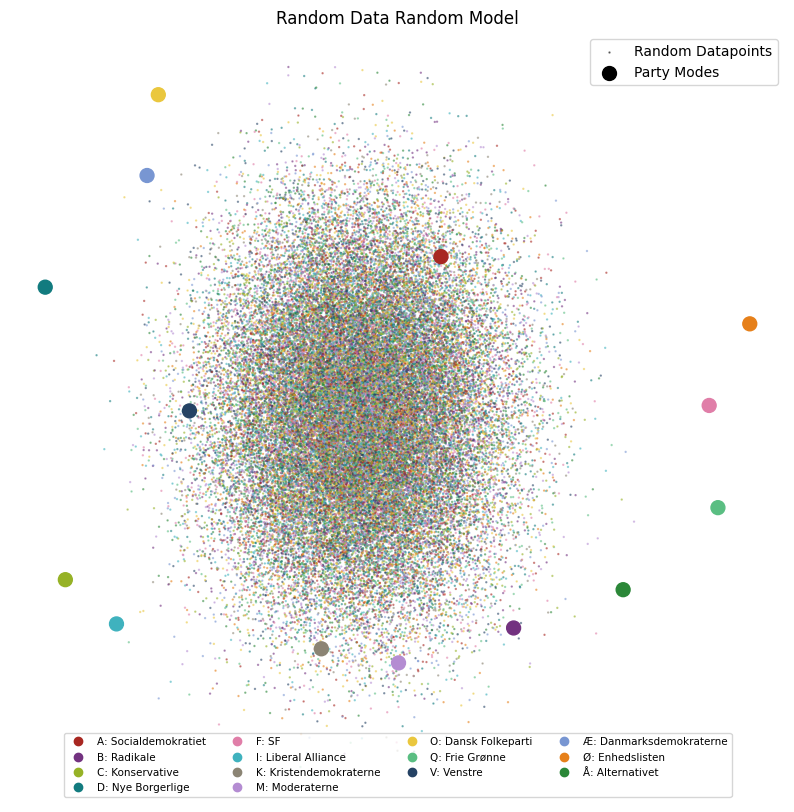

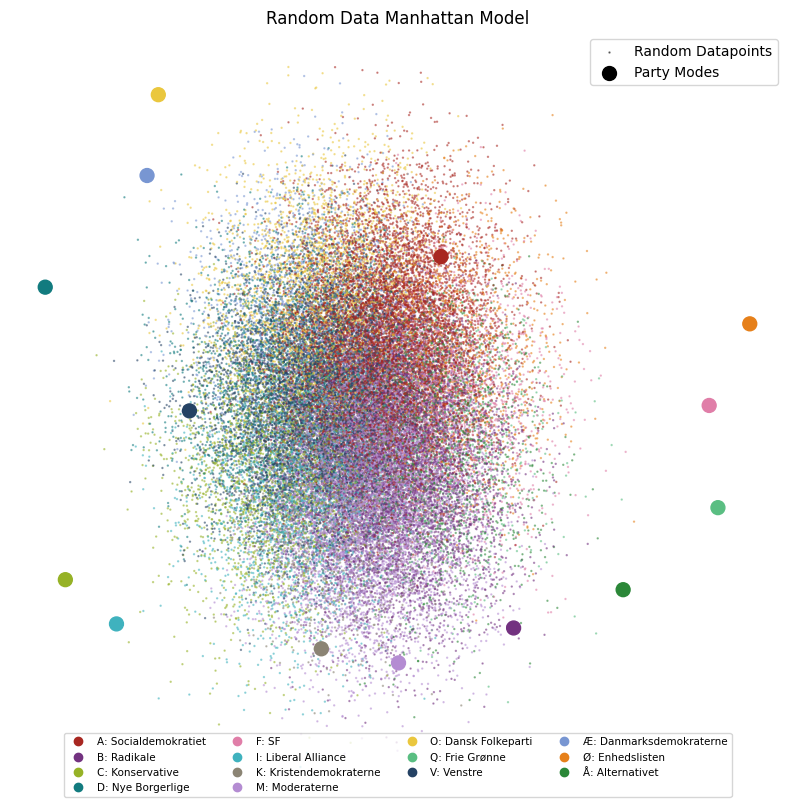

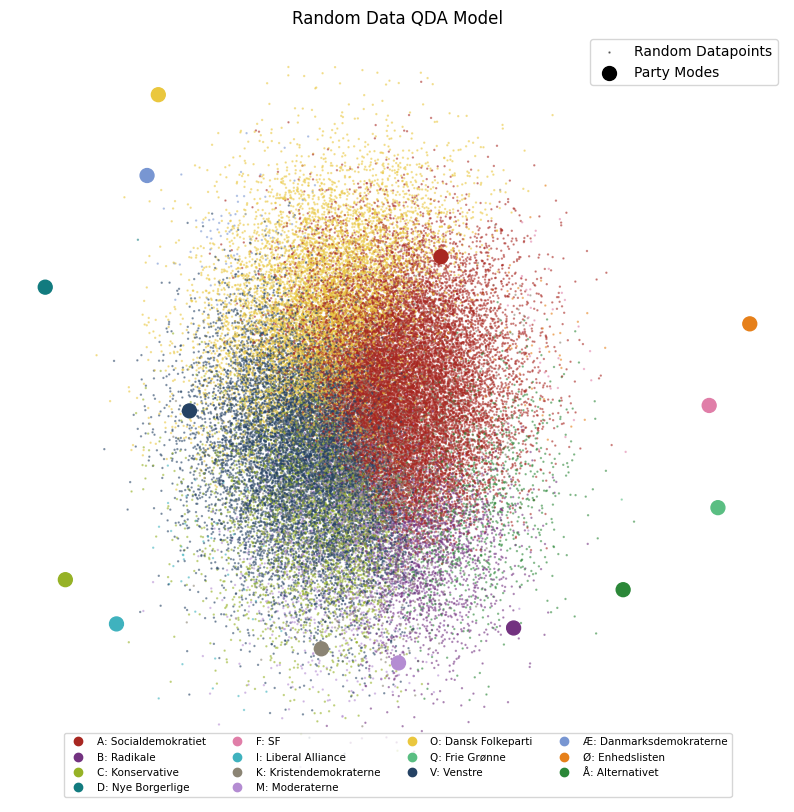

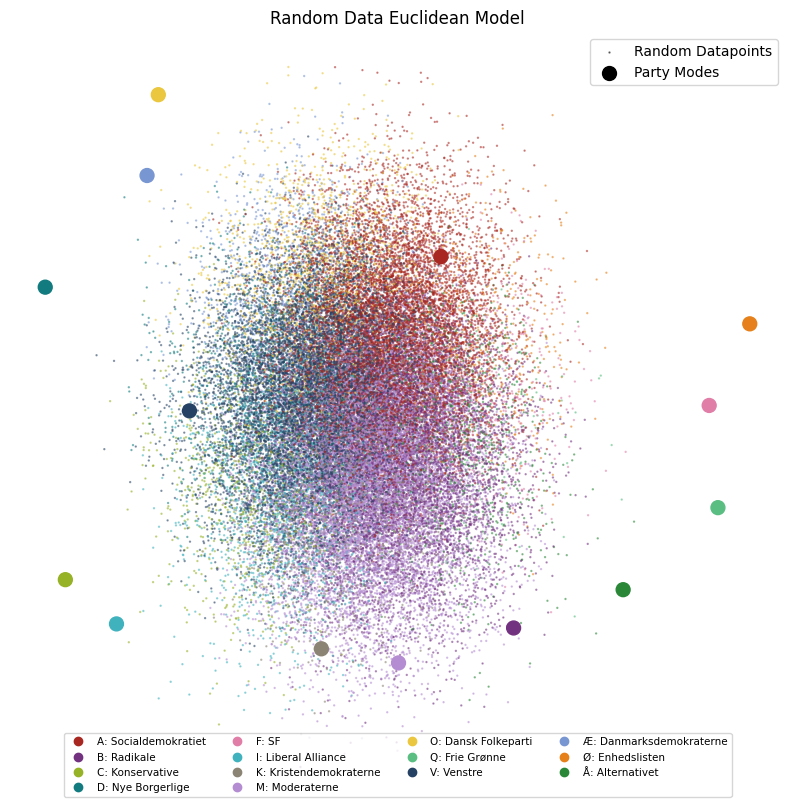

In [45]:
for i in models:
    getPCAPlot(data = Random_Data_results, model = i, dataType = 'Random',  partyMods = modes_df, colors = colours)



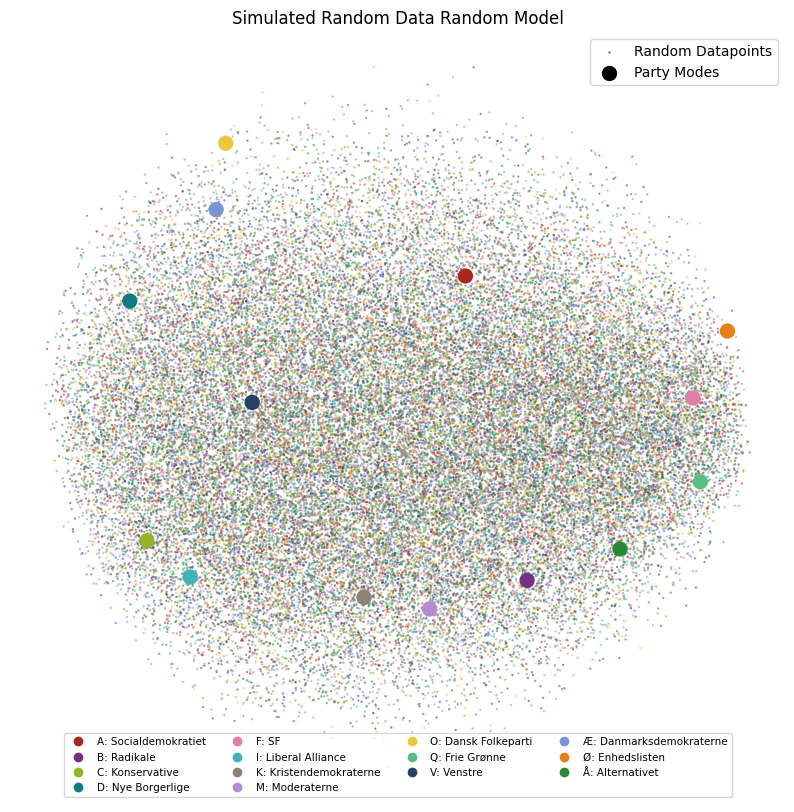

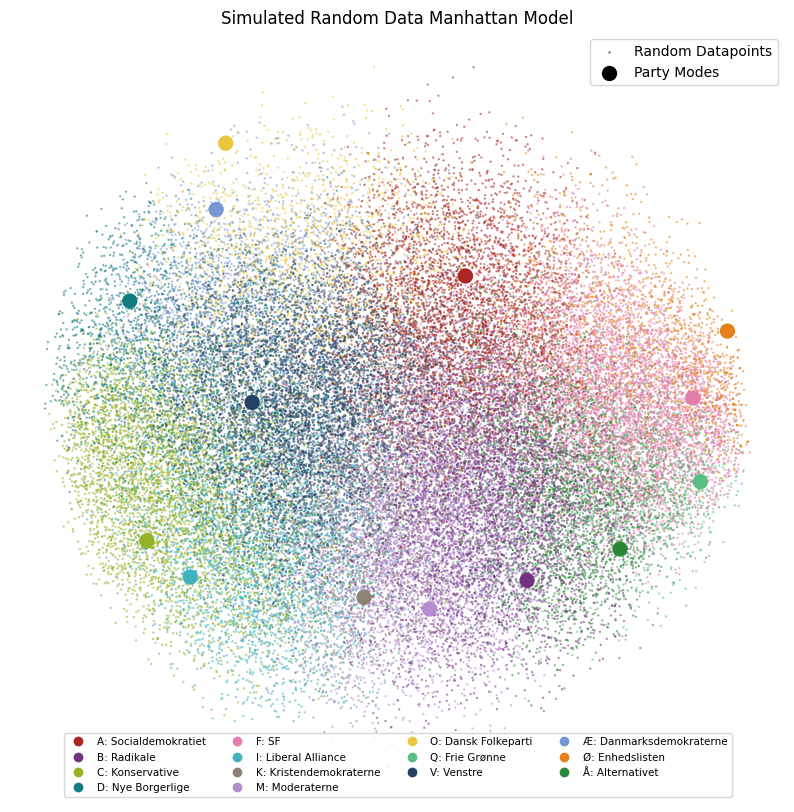

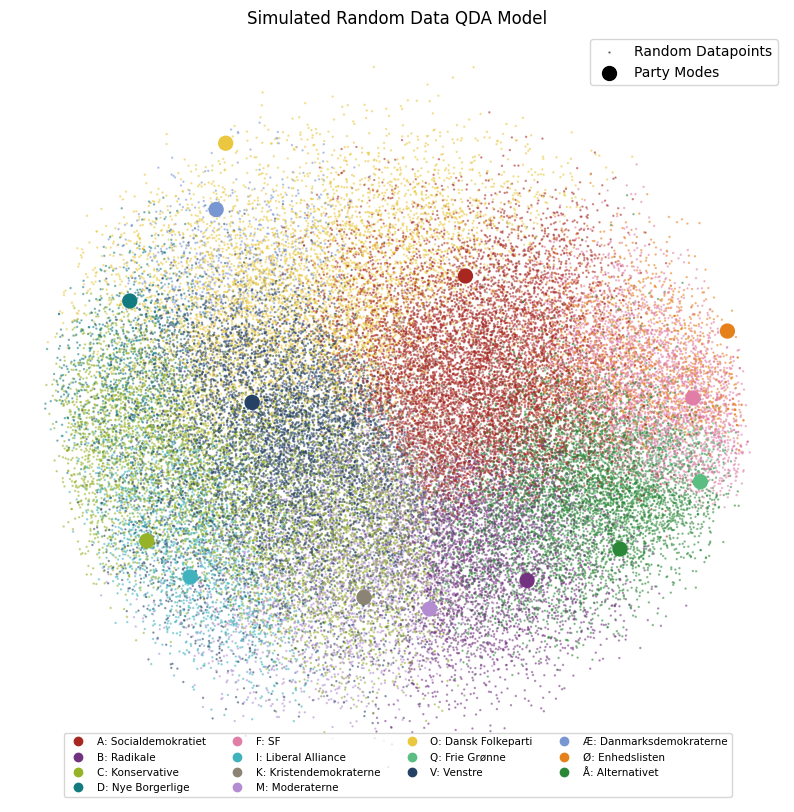

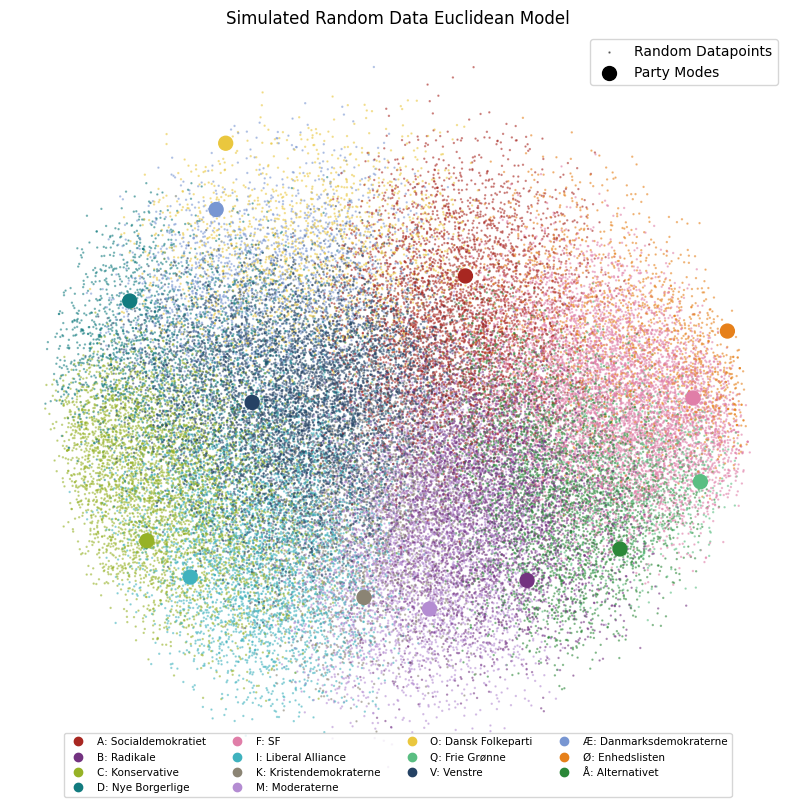

In [46]:
for i in models:
    getPCAPlot(data = Sim_Random_Data_results, model = i, dataType = 'Simulated Random',  partyMods = modes_df, colors = colours)

# Party Distribution of Random and Simulated Random Results

In [47]:
plot_order = {'A: Socialdemokratiet': 'A',
         'B: Radikale': 'B',
         'C: Konservative': 'C',
         'D: Nye Borgerlige': 'D',
         'F: SF': 'E',
         'I: Liberal Alliance': 'F',
         'K: Kristendemokraterne': 'G',
         'M: Moderaterne': 'H',
         'O: Dansk Folkeparti': 'I',
         'Q: Frie Grønne': 'J',
         'V: Venstre': 'K',
         'Æ: Danmarksdemokraterne': 'L',
         'Ø: Enhedslisten': 'M',
         'Å: Alternativet': 'N'}


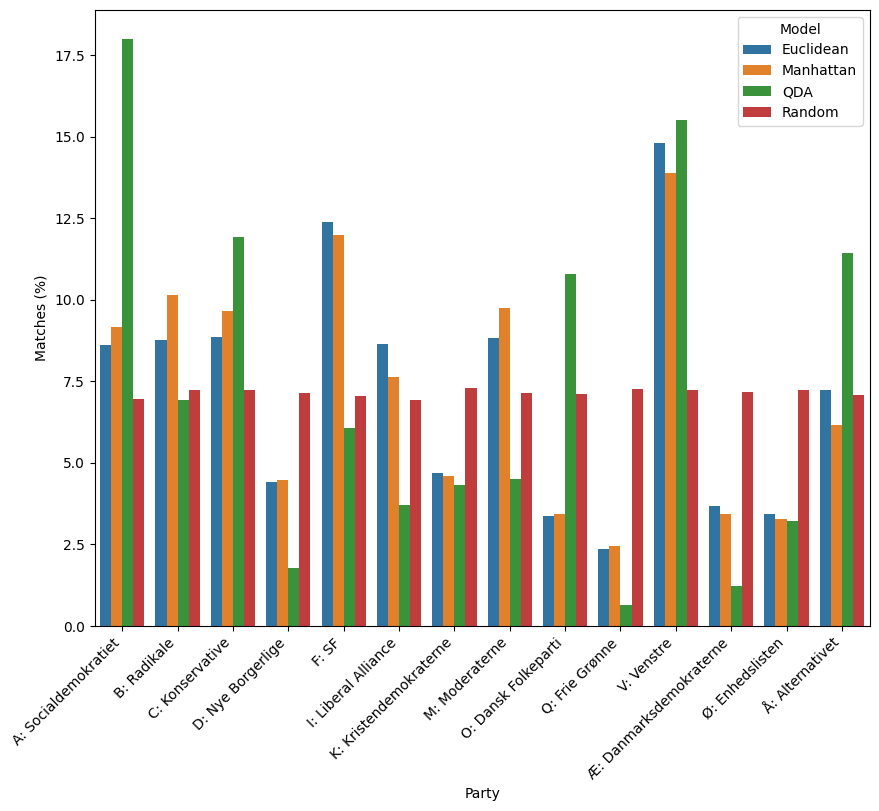

In [48]:
matchData = Sim_Random_Data_results
matchData = matchData.groupby(['Model', 'Party'])['Party'].count().reset_index(name = 'Count')
matchData['Total'] = 50000
matchData['Percent'] = (matchData['Count']/matchData['Total'])*100
matchData["PartyLetter"] = matchData["Party"].str.strip().map(plot_order)
matchData.sort_values(by='PartyLetter', inplace= True)

plt.figure(figsize=(10,8))
ax = sns.barplot(data = matchData, x='Party', y = 'Percent', hue = 'Model', hue_order=['Euclidean', 'Manhattan', 'QDA', 'Random'])
ax.set(ylabel='Matches (%)')
plt.xticks(rotation=45, horizontalalignment = "right")

plt.savefig("Random EDA pics/matches for all models Simulated Random Data.png", dpi=300, bbox_inches='tight')

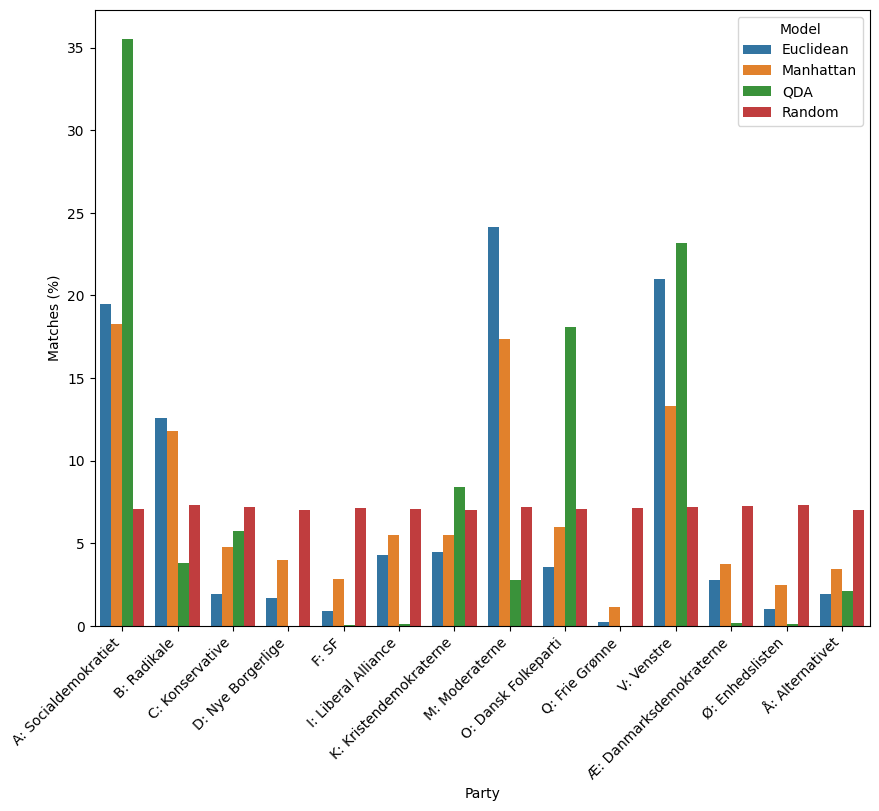

In [49]:
matchData = Random_Data_results
matchData = matchData.groupby(['Model', 'Party'])['Party'].count().reset_index(name = 'Count')
matchData['Total'] = 50000
matchData['Percent'] = (matchData['Count']/matchData['Total'])*100
matchData["PartyLetter"] = matchData["Party"].str.strip().map(plot_order)
matchData.sort_values(by='PartyLetter', inplace= True)

plt.figure(figsize=(10,8))
ax = sns.barplot(data = matchData, x='Party', y = 'Percent', hue = 'Model', hue_order=['Euclidean', 'Manhattan', 'QDA', 'Random'])
ax.set(ylabel='Matches (%)')
plt.xticks(rotation=45, horizontalalignment = "right")

plt.savefig("Random EDA pics/matches for all models Random Data.png", dpi=300, bbox_inches='tight')